# import required module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
import tensorflow as tf1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras
import warnings
from sklearn import decomposition
warnings.filterwarnings('ignore')

Instructions for updating:
non-resource variables are not supported in the long term


# Load data-set

In [2]:

df=pd.read_csv("/content/drive/MyDrive/Dataset/MTP/All_Activity.csv")
df

Time_stamp_sec         1         2         3         4         5  \
0       7.152557e-07  0.012162  0.005372  0.005689  0.006941  0.013136   
1       4.227595e-01  0.019417  0.004365  0.017467  0.012783  0.005486   
2       7.368343e-01  0.002404  0.013390  0.011502  0.010158  0.003352   
3       9.805675e-01  0.010619  0.015050  0.018699  0.000319  0.011122   
4       1.215650e+00  0.006574  0.007201  0.004724  0.001101  0.009369   
...              ...       ...       ...       ...       ...       ...   
2196    3.565157e+02  0.300294  0.166791  0.155930  0.024595  0.063003   
2197    3.572718e+02  0.222309  0.209594  0.209616  0.154318  0.239492   
2198    3.579822e+02  0.138792  0.216504  0.713957  0.384248  0.227561   
2199    3.587376e+02  0.241029  0.181942  0.236581  0.113624  0.205489   
2200    3.594948e+02  0.051880  0.248920  0.195581  0.114890  0.095906   

             6         7         8         9  ...        96        97  \
0     0.013164  0.015125  0.003927  0.011982  ... -1.431029  1.658715   
1     0.005640  0.002650  0.005744  0.002402  ...  2.632000 -2.480699   
2     0.009591  0.002527  0.019817  0.005339  ... -2.106238  2.369294   
3     0.007625  0.011456  0.020549  0.002775  ...  1.775891 -1.555613   
4     0.004236  0.011648  0.011491  0.006268  ... -0.565492  0.493544   
...        ...       ...       ...       ...  ...       ...       ...   
2196  0.073611  0.245571  0.103749  0.054041  ...  1.565846  0.997995   
2197  0.293416  0.129744  0.316540  0.252837  ...  2.341387  2.811029   
2198  0.076942  0.409022  0.030229  0.316751  ... -2.378767 -2.427357   
2199  0.291535  0.390994  0.173994  0.329688  ... -2.383065  0.677491   
2200  0.053559  0.046083  0.056395  0.037836  ...  0.851325  1.056112   

            98        99       100       101       102       103       104  \
0    -2.660998  2.919511  2.608629 -2.768291  0.670073 -3.005982 -0.881872   
1    -2.531461  2.562904 -2.713858 -2.149658 -1.692947 -1.016725  3.072117   
2     1.416724  0.993940  2.527769 -2.504044  1.013208 -2.877881 -3.029874   
3    -2.156544  0.383077  2.957304  1.570796 -2.965438  2.408399  3.080692   
4    -0.448955 -0.214734 -0.395782 -0.261944 -1.993352 -1.846545 -0.208426   
...        ...       ...       ...       ...       ...       ...       ...   
2196  1.061936  1.088682  1.215235  0.899895  0.958297  1.173681  1.123351   
2197  1.826611  0.580882  0.693593  0.236914  0.715073 -2.321794  0.828111   
2198 -2.389044 -2.470082 -2.409881 -2.558775  0.674806  0.868363 -0.782270   
2199  0.826752 -2.245926  2.856896 -0.948657  2.320912  2.331203 -0.846382   
2200  0.955403  0.579894  0.768808  0.839568  1.155797  1.163397  0.827491   

         Activity  
0         Walking  
1         Walking  
2         Walking  
3         Walking  
4         Walking  
...           ...  
2196  No_Activity  
2197  No_Activity  
2198  No_Activity  
2199  No_Activity  
2200  No_Activity  

[2201 rows x 106 columns]

# Visualization of dataset

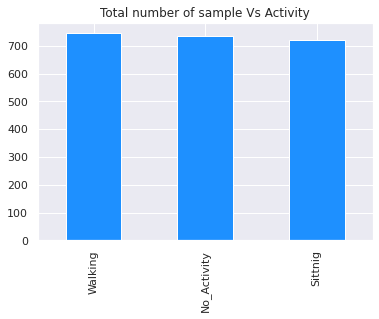

In [3]:
sns.set(color_codes=True)
df['Activity'].value_counts().plot(kind='bar',color="dodgerblue",title='Total number of sample Vs Activity')


## Analysis of Walking activity with Noise reduction using PCA

In [4]:
w_amp=df.iloc[:745,1:53].values
Walking_ts=df.iloc[:745,0]
# w_amp

(745, 3)
(745,)


Text(0, 0.5, 'Amplitudes')

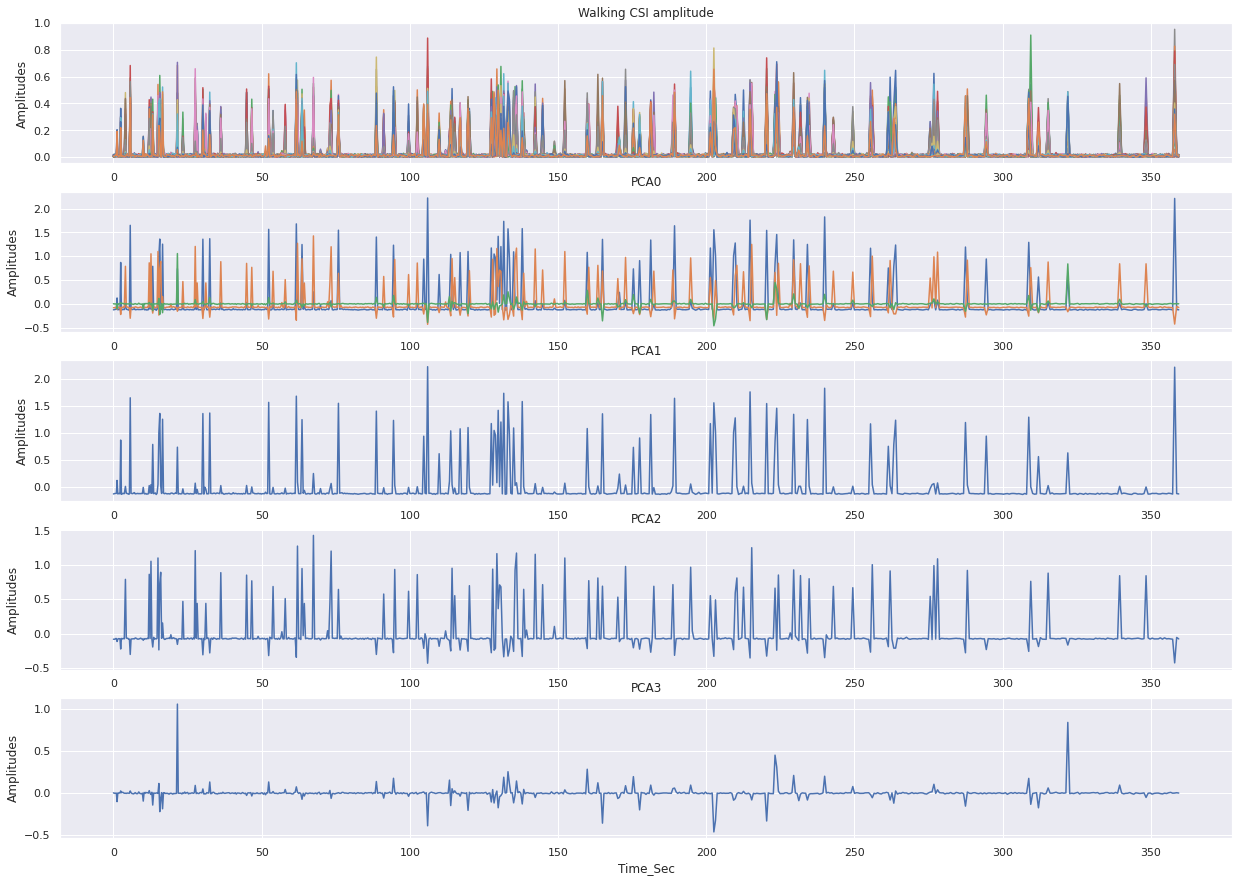

In [5]:
pca = decomposition.PCA(n_components=3)
walking_pca = pca.fit_transform(w_amp)

print(walking_pca.shape)
print(walking_pca.T[0].shape)

fig = plt.figure(figsize = (21, 15))
ax = plt.subplot(511)
plt.plot(Walking_ts,w_amp)
plt.title("Walking CSI amplitude")
plt.ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(Walking_ts,walking_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(Walking_ts, walking_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(Walking_ts, walking_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(Walking_ts, walking_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')
# fig.savefig("Walking_PCA_mag.png")

## Analysis of Sitting activity with Noise reduction using PCA

In [6]:
Sitting_amp=df.iloc[745:1466,1:53].values
Sitting_ts=df.iloc[745:1466,0]
# Sitting_amp

Text(0, 0.5, 'Amplitudes')

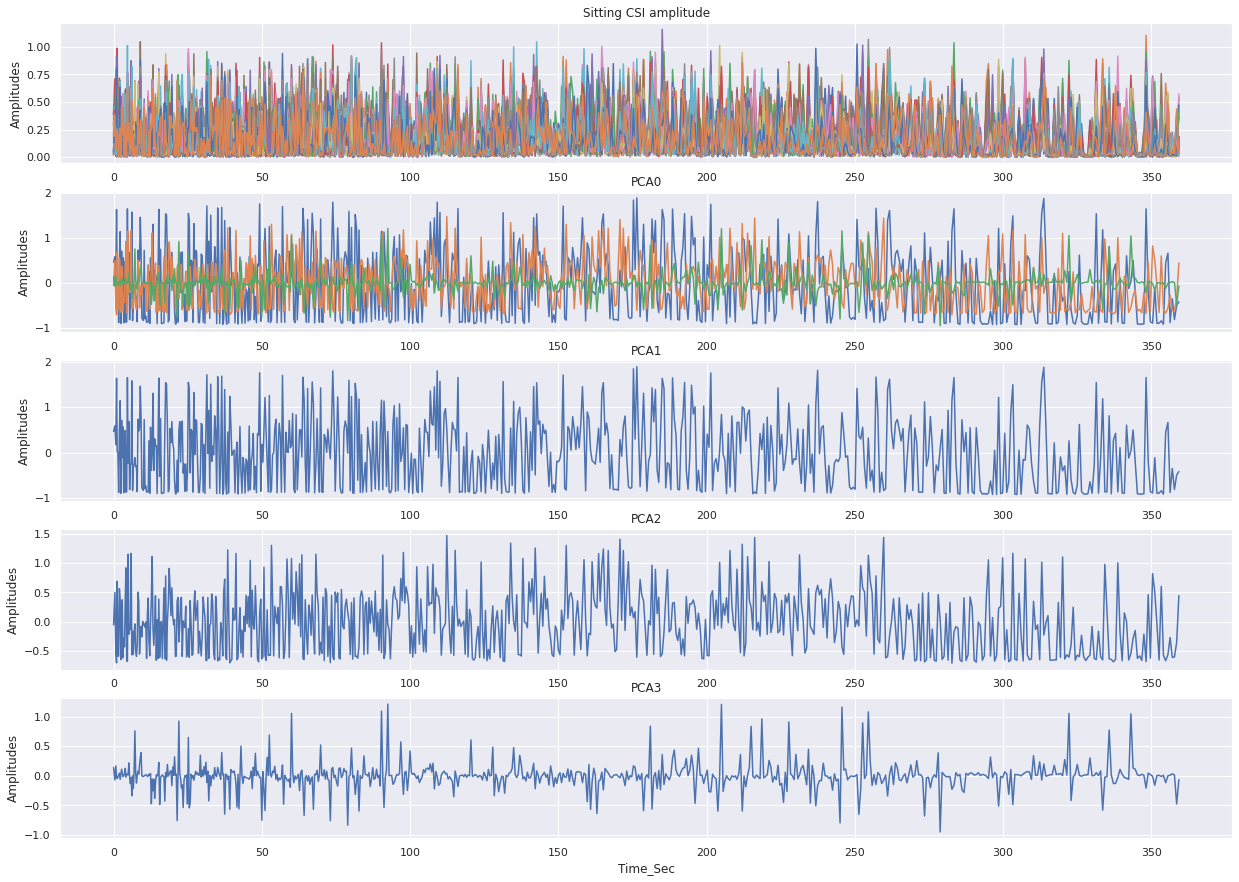

In [7]:
Sitting_pca = pca.fit_transform(Sitting_amp)

fig = plt.figure(figsize = (21, 15))
ax = plt.subplot(511)
plt.plot(Sitting_ts,Sitting_amp)
plt.title("Sitting CSI amplitude")
plt.ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(Sitting_ts,Sitting_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(Sitting_ts, Sitting_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(Sitting_ts, Sitting_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(Sitting_ts, Sitting_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')
# fig.savefig("Sitting_PCA_mag.png")

## Analysis of No_Person activity with Noise reduction using PCA

In [8]:
NP_amp=df.iloc[1466:,1:53].values
NP_ts=df.iloc[1466:,0]
# NP_amp

Text(0, 0.5, 'Amplitudes')

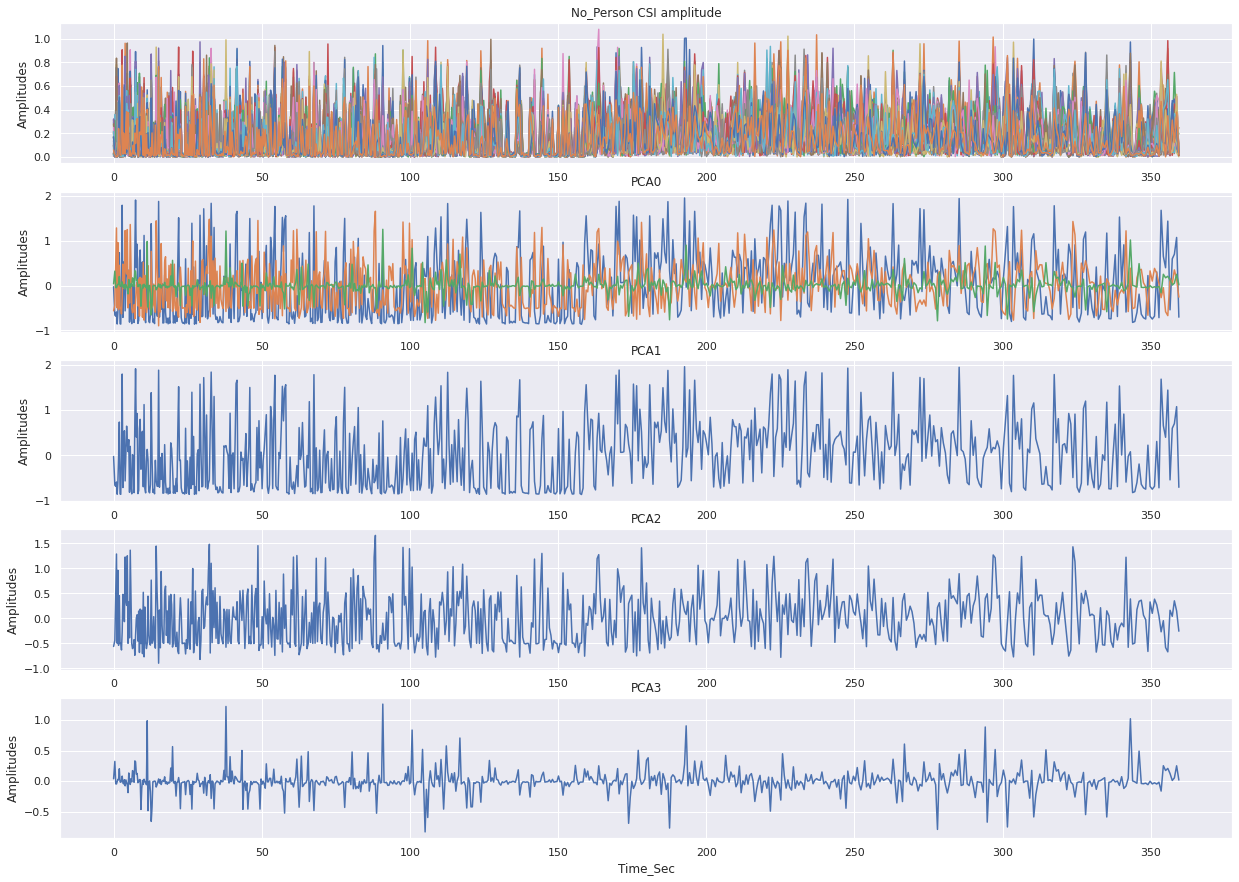

In [9]:
NP_pca = pca.fit_transform(NP_amp)

fig = plt.figure(figsize = (21, 15))
ax = plt.subplot(511)
plt.plot(NP_ts,NP_amp)
plt.title("No_Person CSI amplitude")
plt.ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(NP_ts,NP_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(NP_ts, NP_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(NP_ts, NP_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(NP_ts, NP_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')
# fig.savefig("NP_PCA_mag.png")


## Analysis of All activity

In [10]:
dataset_amp=df.iloc[:,1:53].values
dataset_phs=df.iloc[:,53:-1].values

dataset_labels=df.iloc[:,-1]
Time_stamp=df.iloc[:,0]
# dataset_amp
# dataset_phs
# dataset_labels
# Time_stamp

Text(0, 0.5, 'Amplitudes')

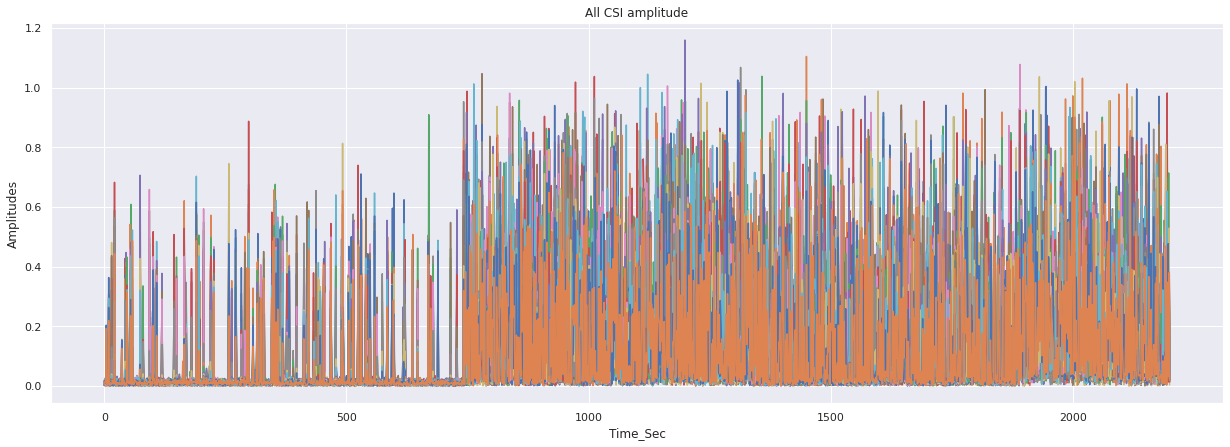

In [11]:
fig = plt.figure(figsize = (21, 7))
plt.plot(dataset_amp)
plt.title("All CSI amplitude")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')


Text(0.5, 1.0, 'All CSI amplitude Spectrogram')

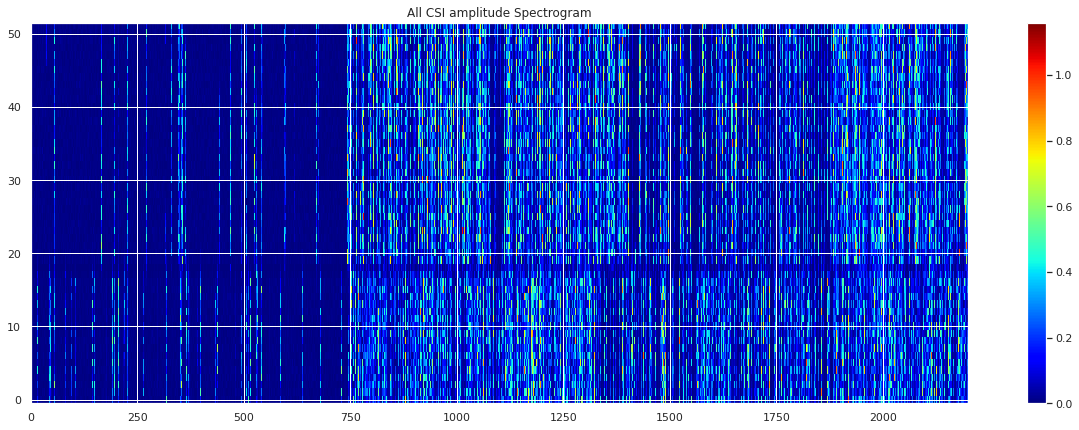

In [12]:
fig = plt.figure(figsize = (21, 7))
im = plt.imshow((dataset_amp).T,interpolation = "nearest", aspect = "auto", cmap="jet", origin='lower')
plt.colorbar()
plt.title("All CSI amplitude Spectrogram")

Text(0, 0.5, 'Amplitudes')

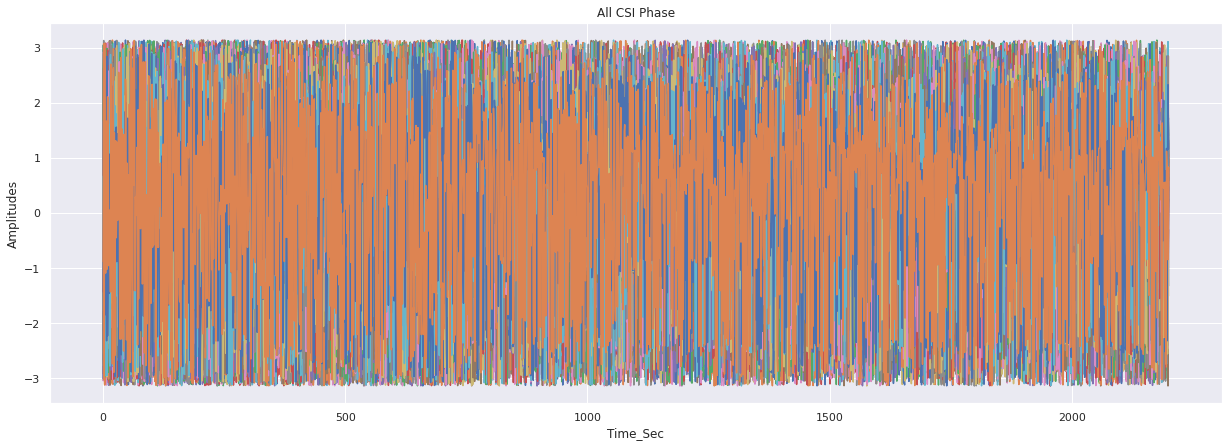

In [13]:
fig = plt.figure(figsize = (21, 7))
plt.plot(dataset_phs)
plt.title("All CSI Phase")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')

# PCA for Dimensionality and Noise redution

## Amplitude Noise reduction using PCA

(2201, 3)
(2201,)


Text(0, 0.5, 'Amplitudes')

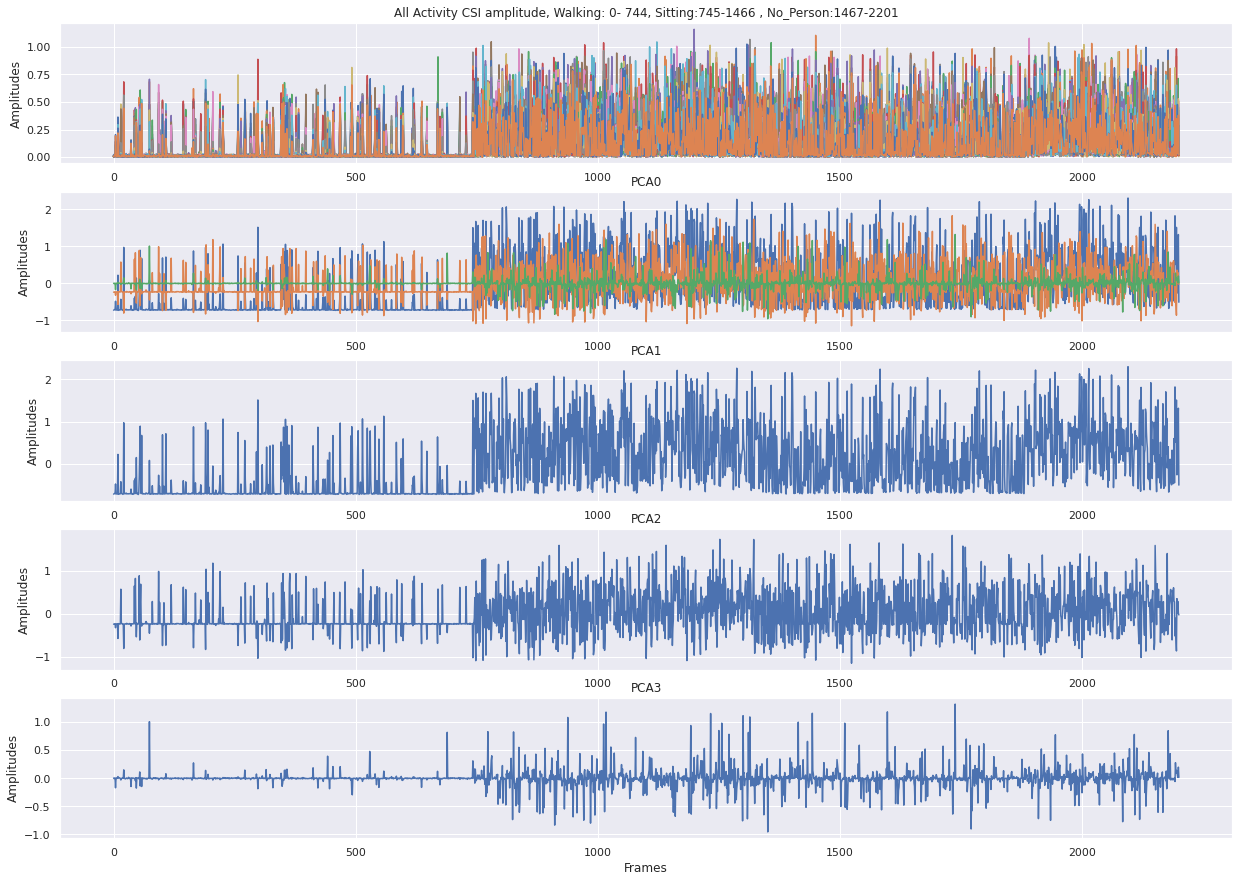

In [14]:

pca = decomposition.PCA(n_components=3)
amp_pca = pca.fit_transform(dataset_amp)

print(amp_pca.shape)
print(amp_pca.T[0].shape)

fig = plt.figure(figsize = (21, 15))
ax = plt.subplot(511)
plt.plot(dataset_amp)
plt.title("All Activity CSI amplitude, Walking: 0- 744, Sitting:745-1466 , No_Person:1467-2201")
plt.ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(amp_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(amp_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(amp_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(amp_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Frames')
plt.ylabel('Amplitudes')
# fig.savefig("All_PCA_mag.png")


## Phase Noise reduction using PCA

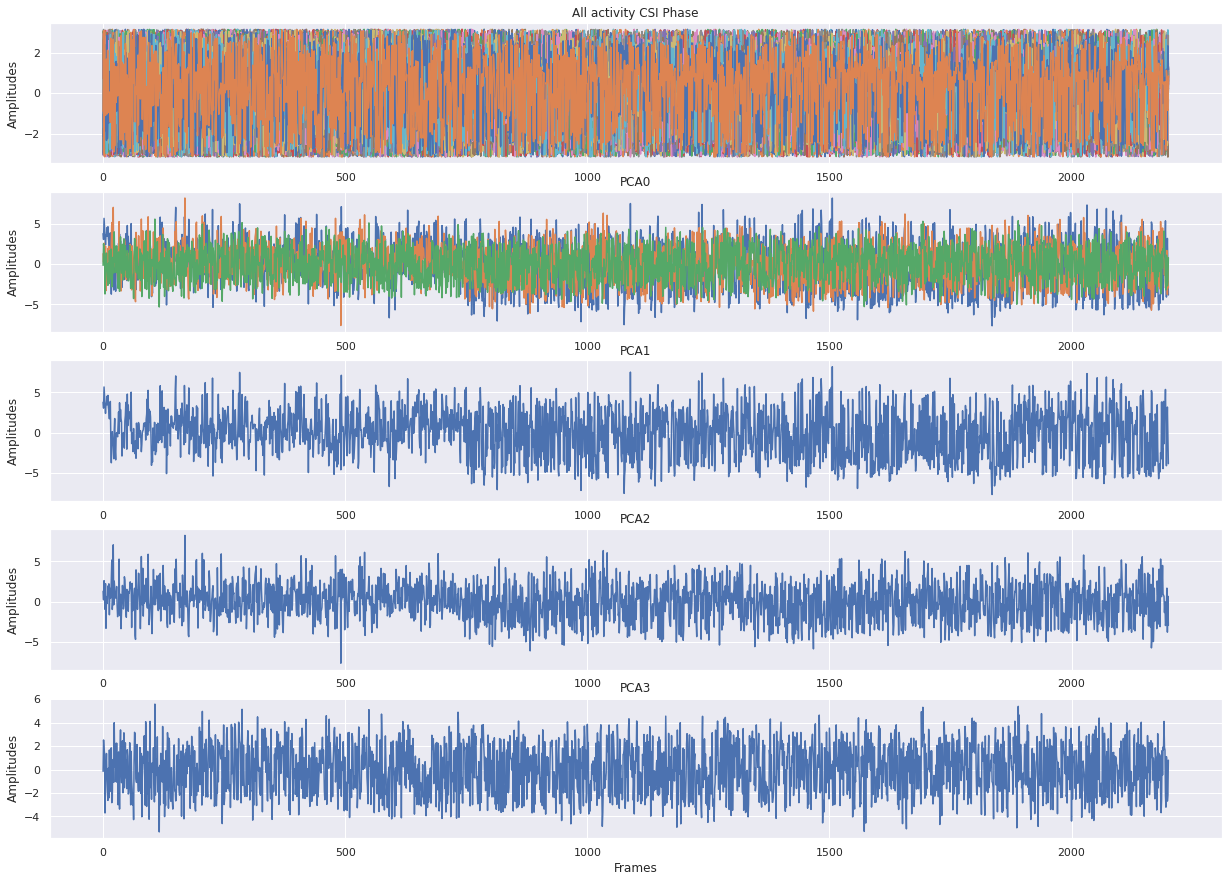

In [15]:


pca = decomposition.PCA(n_components=3)
phase_pca = pca.fit_transform(dataset_phs)

# print(phase_pca.shape)
# print(phase_pca.T[0].shape)

fig = plt.figure(figsize = (21, 15))
ax1 = fig.add_subplot(511)
plt.plot(dataset_phs)
# annotation_line(ax=ax1, text='Walking', xmin=1, xmax=745, y=70, ytext=62, linewidth=1, linecolor='black', fontsize=14)


ax1.set_title("All activity CSI Phase")
ax1.set_ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(phase_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(phase_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(phase_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(phase_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Frames')
plt.ylabel('Amplitudes')


plt.show()


## Extract PC1 of amp and Phase to make dataset

In [16]:
amp_df=pd.DataFrame(amp_pca.T[0], columns=["PC1_amp"])
amp_df

PC1_amp
0    -0.723190
1    -0.715935
2    -0.711068
3    -0.709781
4    -0.482959
...        ...
2196 -0.265868
2197  0.825568
2198  0.998762
2199  1.316721
2200 -0.509440

[2201 rows x 1 columns]

In [17]:
phs_df=pd.DataFrame(phase_pca.T[0], columns=["PC1_phs"])
phs_df

PC1_phs
0     3.775191
1     3.049547
2     5.667525
3     4.561247
4     3.577246
...        ...
2196 -4.087178
2197  0.500710
2198  3.181771
2199 -0.045009
2200 -3.832081

[2201 rows x 1 columns]

In [18]:
amp_phs_df = pd.concat([amp_df, phs_df, df[['Activity']]], axis = 1)
amp_phs_df

PC1_amp   PC1_phs     Activity
0    -0.723190  3.775191      Walking
1    -0.715935  3.049547      Walking
2    -0.711068  5.667525      Walking
3    -0.709781  4.561247      Walking
4    -0.482959  3.577246      Walking
...        ...       ...          ...
2196 -0.265868 -4.087178  No_Activity
2197  0.825568  0.500710  No_Activity
2198  0.998762  3.181771  No_Activity
2199  1.316721 -0.045009  No_Activity
2200 -0.509440 -3.832081  No_Activity

[2201 rows x 3 columns]

In [19]:
# amp_phs_df.to_csv("/home/ranjit/python_uhd_install/Dataset_Preparation/PCA_amp_phs.csv")

# DWT for Noise reduction and features extraction

## Required function

In [20]:
def madev(d,axis=None): # Mean absolute deviation of a signal
    return np.mean(np.absolute(d-np.mean(d,axis)),axis)


def wavelet_denoising(x, wavelet='db4', level=6):                                   
    coeff = pywt.wavedec(x, wavelet, mode="symmetric") #symmetric, per, zero, constant, reflect, smooth,
#     print(np.array(coeff)[0].shape)
    sigma = (1/0.6745) * madev(coeff[0][1])
    
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='soft') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='symmetric')



def annotation_line( ax, xmin, xmax, y, text, ytext=0, linecolor='black', linewidth=1, fontsize=12 ):

    ax.annotate('', xy=(xmin, y), xytext=(xmax, y), xycoords='data', textcoords='data', annotation_clip=False,
            arrowprops={'arrowstyle': '|-|', 'color':linecolor, 'linewidth':linewidth})
    
    ax.annotate('', xy=(xmin, y), xytext=(xmax, y), xycoords='data', textcoords='data', annotation_clip=False,
            arrowprops={'arrowstyle': '<->', 'color':linecolor, 'linewidth':linewidth})

    xcenter = xmin + (xmax-xmin)/2
    if ytext == 0:
        ytext = y + ( ax.get_ylim()[1] - ax.get_ylim()[0] ) / 20

    ax.annotate(text, xy=(xcenter,ytext), ha='center', va='center', fontsize=fontsize, annotation_clip=False)

    
    
'''
def DWT_noise(vals, th=10):
    threshold = th # Threshold for filtering

    data = vals.copy() 
    # print("data: ", data.shape)

    w = pywt.Wavelet('sym5')
    maxlev = pywt.dwt_max_level(data.shape[1], w.dec_len)
    # print("maximum level is " + str(maxlev))
    
    # Decompose into wavelet components, to the level selected:
    coeffs = pywt.wavedec(data, 'sym5', level=maxlev)
    
    
    #plt.figure()
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
    datarec = pywt.waverec(coeffs, 'sym5')
    return datarec

'''


'\ndef DWT_noise(vals, th=10):\n    threshold = th # Threshold for filtering\n\n    data = vals.copy() \n    # print("data: ", data.shape)\n\n    w = pywt.Wavelet(\'sym5\')\n    maxlev = pywt.dwt_max_level(data.shape[1], w.dec_len)\n    # print("maximum level is " + str(maxlev))\n    \n    # Decompose into wavelet components, to the level selected:\n    coeffs = pywt.wavedec(data, \'sym5\', level=maxlev)\n    \n    \n    #plt.figure()\n    for i in range(1, len(coeffs)):\n        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))\n    datarec = pywt.waverec(coeffs, \'sym5\')\n    return datarec\n\n'

Text(0.5, 1.0, 'DWT Noise removal')

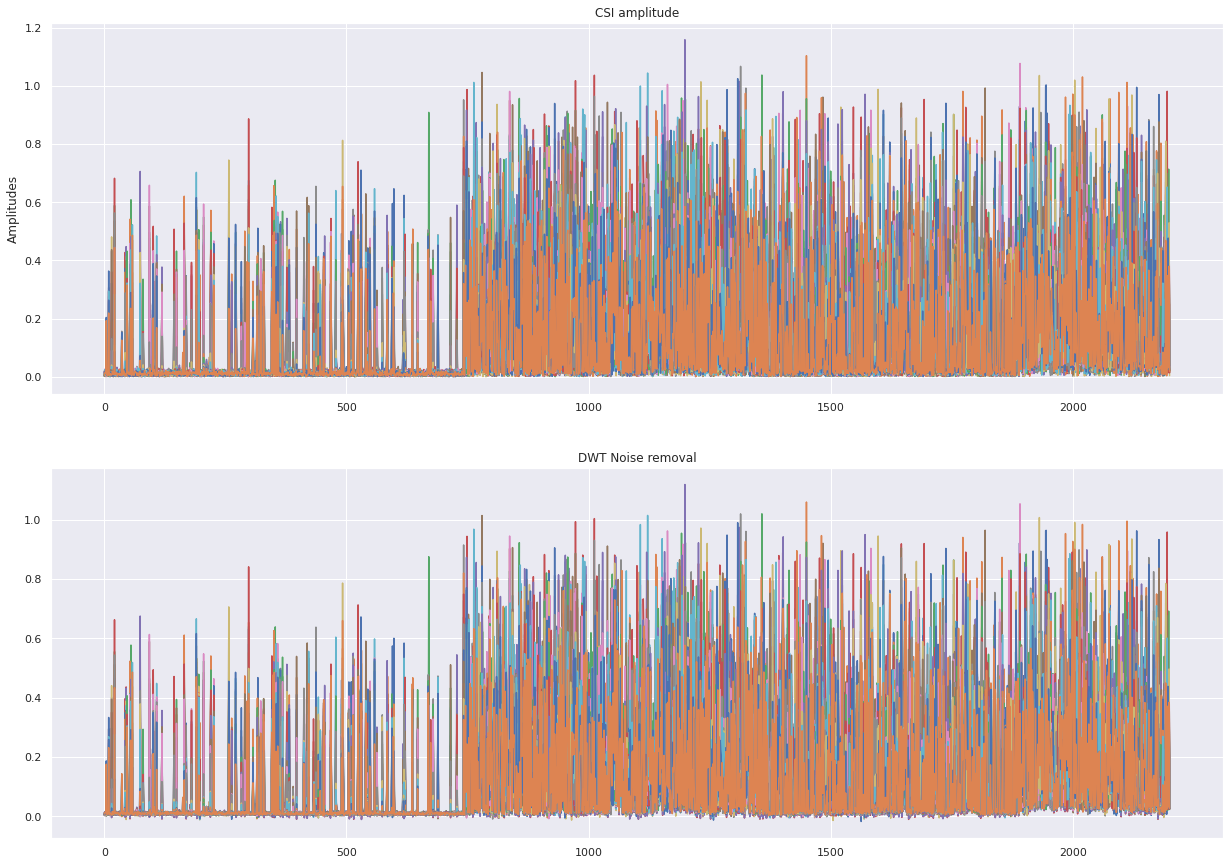

In [21]:
fig = plt.figure(figsize = (21, 15))

ax = plt.subplot(211)
plt.plot(dataset_amp)
plt.title("CSI amplitude")
plt.ylabel('Amplitudes')

ax = plt.subplot(212)
amp1_with_dwt = wavelet_denoising(dataset_amp)
plt.plot(amp1_with_dwt)
plt.title("DWT Noise removal")

## Dimensionality Reduction using PCA

### Mathematically the main objective of PCA is to:
1. Find an orthonormal basis for the data.
2. Sort dimensions in the order of importance.
3. Discard the low significance dimensions.
4. Focus on uncorrelated and Gaussian components.

### Steps involved in PCA
1. Standardize the PCA.
2. Calculate the covariance matrix.
3. Find the eigenvalues and eigenvectors for the covariance matrix.
4. Plot the vectors on the scaled data.

## Amplitude Dimensionality Reduction using PCA

##  1. Standardizing the features

In [22]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_features_amp = StandardScaler().fit_transform(amp_pca)


In [23]:
# fig = plt.figure(figsize = (21, 7))
# plt.plot(x)

# PCA Projection to 2D

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents_amp = pca.fit_transform(std_features_amp)
principalDf_amp = pd.DataFrame(data = principalComponents_amp
             , columns = ['PC_amp1', 'PC_amp2'])

principalDf_amp

PC_amp1   PC_amp2
0    -0.943585 -0.382909
1    -0.934119 -0.410191
2    -0.927769 -0.367349
3    -0.926090 -0.382340
4    -0.630143 -1.088917
...        ...       ...
2196 -0.346892  1.009488
2197  1.077163  0.201364
2198  1.303139  0.518883
2199  1.717997  0.676658
2200 -0.664694  0.011213

[2201 rows x 2 columns]

## Phase Dimensionality Reduction using PCA

In [25]:
std_features_phs = StandardScaler().fit_transform(phase_pca)

# PCA Projection to 2D
principalComponents_phs = pca.fit_transform(std_features_phs)
principalDf_phs = pd.DataFrame(data = principalComponents_phs
             , columns = ['PC_phs1', 'PC_phs2'])

principalDf_phs

PC_phs1   PC_phs2
0    -0.072394  0.543542
1     1.165900  0.099278
2     0.790224  1.100797
3     0.642491  0.307038
4    -1.715599 -0.399930
...        ...       ...
2196  0.508907 -0.198488
2197  0.275917  0.709502
2198 -1.246015 -1.597324
2199 -1.006128  0.286871
2200  0.368237 -1.243861

[2201 rows x 2 columns]

In [26]:
finalDf = pd.concat([principalDf_amp, principalDf_phs, df[['Activity']]], axis = 1)
finalDf

PC_amp1   PC_amp2   PC_phs1   PC_phs2     Activity
0    -0.943585 -0.382909 -0.072394  0.543542      Walking
1    -0.934119 -0.410191  1.165900  0.099278      Walking
2    -0.927769 -0.367349  0.790224  1.100797      Walking
3    -0.926090 -0.382340  0.642491  0.307038      Walking
4    -0.630143 -1.088917 -1.715599 -0.399930      Walking
...        ...       ...       ...       ...          ...
2196 -0.346892  1.009488  0.508907 -0.198488  No_Activity
2197  1.077163  0.201364  0.275917  0.709502  No_Activity
2198  1.303139  0.518883 -1.246015 -1.597324  No_Activity
2199  1.717997  0.676658 -1.006128  0.286871  No_Activity
2200 -0.664694  0.011213  0.368237 -1.243861  No_Activity

[2201 rows x 5 columns]

In [27]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('PC1', fontsize = 15)
# ax.set_ylabel('PC2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# Activity = ['Sitting', 'Walking', 'No_Person']
# colors = ['r', 'g', 'b']
# for Activity, color in zip(Activity,colors):
#     indicesToKeep = finalDf['Activity'] == Activity
#     ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
#                , finalDf.loc[indicesToKeep, 'PC2']
#                , c = color
#                , s = 50)
# ax.legend(Activity)
# ax.grid()

# Data Preprocessing

In [28]:
from scipy import stats

num_time_steps = 1
num_features=2
step = 1
segments = []
labels = []
for i in range(0, len(df) - num_time_steps, step):
    S0 = amp_phs_df['PC1_amp'].values[i: i + num_time_steps]
    S1 = amp_phs_df['PC1_phs'].values[i: i + num_time_steps]
#     S2 = finalDf['PC_phs1'].values[i: i + num_time_steps]
#     S3 = finalDf['PC_phs2'].values[i: i + num_time_steps]
    
    
#     S4 = df['S4'].values[i: i + num_time_steps]
#     S5 = df['S5'].values[i: i + num_time_steps]
#     S6 = df['S6'].values[i: i + num_time_steps]
#     S7 = df['S7'].values[i: i + num_time_steps]
#     S8 = df['S8'].values[i: i + num_time_steps]
#     S9 = df['S9'].values[i: i + num_time_steps]
    
    
    
    label = stats.mode(df['Activity'][i: i + num_time_steps])[0][0]
#     segments.append([S0,S1,S2,S3,S4,S5,S6,S7,S8,S9])
    segments.append([S0,S1])

    
    labels.append(label)

In [29]:
np.array(segments).shape

(2200, 2, 1)

# Transfering shape of segment

In [30]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, num_time_steps, num_features)


# One-Hot encoding on label (Walking, Sitting, ....)

In [31]:
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)
# labels
reshaped_segments.shape


(2200, 1, 2)

# Split the dataset into training (70%) and testing (30%)

In [32]:
CSI_Amp=amp_phs_df.iloc[:,:-1].values
Activity=amp_phs_df.iloc[:,-1].values


In [33]:
# Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split
RANDOM_SEED = 42
X_train,X_test,Y_train,Y_test=train_test_split(CSI_Amp,Activity,test_size=0.20,random_state=RANDOM_SEED)
# X_train, X_test, Y_train, Y_test = train_test_split(reshaped_segments, labels, test_size=0.3, random_state=RANDOM_SEED)


In [34]:
len(X_train)
X_train[0]

array([0.22840151, 0.06571437])

In [35]:
len(X_test)
X_test.shape

(441, 2)

In [36]:
# Features scaling (optional): in order to improve the performance

# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

## K-fold cross validation

In [37]:
from sklearn.model_selection import KFold

k = 10
kf = KFold(n_splits=k , shuffle=True, random_state=42)

# Apply ML Model: 
1. KNN
2. SVM
3. Decision Tree
4. Random Forest
5. XGBoost
6. RNN- LSTM

# 1. KNN

KNN Hyperparameters tuning

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

weights=['uniform','distance' ]
n_neighbors = list(range(1,3)) # 30
leaf_size = list(range(1,5)) # 50
algorithm=['auto', 'ball_tree'] # , 'kd_tree', 'brute'
p=[1,2]
metric=['minkowski']
KNN_param=dict(weights=weights, n_neighbors=n_neighbors, leaf_size=leaf_size, algorithm=algorithm, p=p, metric=metric)

# metric: str or callable, default=’minkowski’
# metric_params: dict, default=None

model_KNN=KNeighborsClassifier()

clf_KNN=GridSearchCV(model_KNN, KNN_param, cv=kf, return_train_score=False, refit = True) # , verbose = 3

clf_KNN.fit(X_train,Y_train)



GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree'],
                         'leaf_size': [1, 2, 3, 4], 'metric': ['minkowski'],
                         'n_neighbors': [1, 2], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [39]:
result_KNN=pd.DataFrame(clf_KNN.cv_results_)
result_KNN
result_KNN[['param_algorithm','param_metric','param_n_neighbors','param_weights','mean_test_score','rank_test_score']]

param_algorithm param_metric param_n_neighbors param_weights  \
0             auto    minkowski                 1       uniform   
1             auto    minkowski                 1      distance   
2             auto    minkowski                 1       uniform   
3             auto    minkowski                 1      distance   
4             auto    minkowski                 2       uniform   
..             ...          ...               ...           ...   
59       ball_tree    minkowski                 1      distance   
60       ball_tree    minkowski                 2       uniform   
61       ball_tree    minkowski                 2      distance   
62       ball_tree    minkowski                 2       uniform   
63       ball_tree    minkowski                 2      distance   

    mean_test_score  rank_test_score  
0          0.592614                9  
1          0.592614                9  
2          0.591477               33  
3          0.591477               33  
4          0.589205               57  
..              ...              ...  
59         0.591477               33  
60         0.589205               57  
61         0.592614                9  
62         0.593182                1  
63         0.591477               33  

[64 rows x 6 columns]

In [40]:
acc_KNN=clf_KNN.best_score_*100
print(f"Accuracy with KNN: {acc_KNN} %")

Accuracy with KNN: 59.31818181818181 %


## K - Fold cross validation Score

In [41]:
from sklearn.model_selection import cross_val_score
kf_KNN=cross_val_score(model_KNN,X_train, Y_train,cv=kf ,scoring='accuracy')

# Score of K-fold cross validation

kf_KNN.mean()

0.6147727272727274

## Accuracy -- KNN

In [42]:
from sklearn.metrics import accuracy_score
Y_pred_KNN=clf_KNN.predict(X_test)
accuracy_score(Y_test,Y_pred_KNN)


0.6077097505668935

## Confusion Matrix -- KNN 

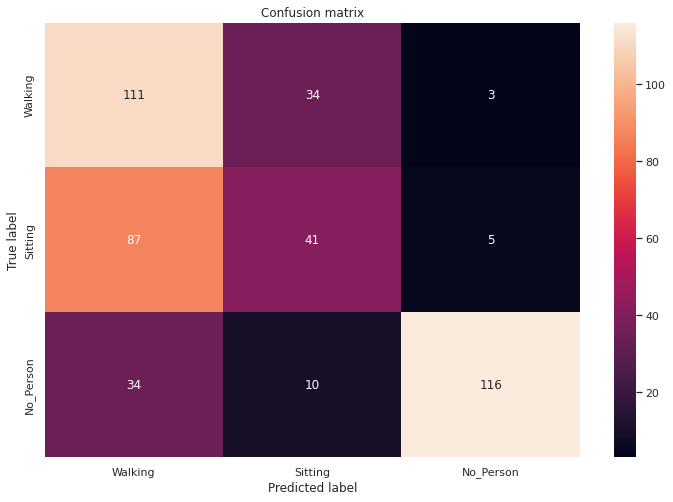

In [43]:
from sklearn.metrics import confusion_matrix

LABELS = ['Walking','Sitting','No_Person']

confusion_matrix_KNN = confusion_matrix(Y_test, Y_pred_KNN)

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix_KNN, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 2. Support Vector Machine (SVM)

## Hyper Parameter Tuning -- SVM Classifier

In [44]:
from sklearn.svm import SVC

SVM_param={'C': [0.1, 1, 10, 100, 1000],
           'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
           'kernel':['rbf','linear']
           }

# refit = True, verbose = 3

model_SVM=SVC()

clf_SVM=GridSearchCV(model_SVM, SVM_param, cv=kf, return_train_score=False, refit = True) # , verbose = 3

clf_SVM.fit(X_train,Y_train)



GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [45]:
acc_SVM=clf_SVM.best_score_*100
print(f"Accuracy with SVM: {acc_SVM} %")


Accuracy with SVM: 63.63636363636363 %


In [46]:
# dir(clf)

In [47]:
result_SVM=pd.DataFrame(clf_SVM.cv_results_)
# result_SVM
result_SVM[['param_C','param_gamma', 'param_kernel','mean_test_score','rank_test_score']]

param_C param_gamma param_kernel  mean_test_score  rank_test_score
0      0.1           1          rbf         0.623864               15
1      0.1           1       linear         0.620455               17
2      0.1         0.1          rbf         0.625000               14
3      0.1         0.1       linear         0.620455               17
4      0.1        0.01          rbf         0.570455               45
5      0.1        0.01       linear         0.620455               17
6      0.1       0.001          rbf         0.331250               49
7      0.1       0.001       linear         0.620455               17
8      0.1      0.0001          rbf         0.318750               50
9      0.1      0.0001       linear         0.620455               17
10       1           1          rbf         0.619886               22
11       1           1       linear         0.619318               23
12       1         0.1          rbf         0.634659                4
13       1         0.1       linear         0.619318               23
14       1        0.01          rbf         0.622727               16
15       1        0.01       linear         0.619318               23
16       1       0.001          rbf         0.567045               46
17       1       0.001       linear         0.619318               23
18       1      0.0001          rbf         0.331818               48
19       1      0.0001       linear         0.619318               23
20      10           1          rbf         0.628977                8
21      10           1       linear         0.618182               33
22      10         0.1          rbf         0.635227                3
23      10         0.1       linear         0.618182               33
24      10        0.01          rbf         0.636364                1
25      10        0.01       linear         0.618182               33
26      10       0.001          rbf         0.615909               43
27      10       0.001       linear         0.618182               33
28      10      0.0001          rbf         0.557386               47
29      10      0.0001       linear         0.618182               33
30     100           1          rbf         0.629545                7
31     100           1       linear         0.618182               33
32     100         0.1          rbf         0.626136               13
33     100         0.1       linear         0.618182               33
34     100        0.01          rbf         0.635795                2
35     100        0.01       linear         0.618182               33
36     100       0.001          rbf         0.628409                9
37     100       0.001       linear         0.618182               33
38     100      0.0001          rbf         0.608523               44
39     100      0.0001       linear         0.618182               33
40    1000           1          rbf         0.631250                5
41    1000           1       linear         0.618182               28
42    1000         0.1          rbf         0.626705               11
43    1000         0.1       linear         0.618182               28
44    1000        0.01          rbf         0.627273               10
45    1000        0.01       linear         0.618182               28
46    1000       0.001          rbf         0.630114                6
47    1000       0.001       linear         0.618182               28
48    1000      0.0001          rbf         0.626705               11
49    1000      0.0001       linear         0.618182               28

In [48]:

model_SVM=SVC(kernel='rbf',C=100,gamma=0.01)
model_SVM.fit(X_train,Y_train)

Y_pred_SVM=model_SVM.predict(X_test)
SVM_acc=model_SVM.score(X_test, Y_test)
print(f"SVM_accuracy: {SVM_acc*100} %")


SVM_accuracy: 63.26530612244898 %


## Score of K-fold cross validation

In [49]:
from sklearn.model_selection import cross_val_score
kf_SVM=cross_val_score(model_SVM, X_train, Y_train,cv=kf ,scoring='accuracy')

print(f"SVM K-fold cross validation mean Score: {kf_SVM.mean()*100} %")

SVM K-fold cross validation mean Score: 63.57954545454545 %


## Confusion matrix -- SVM

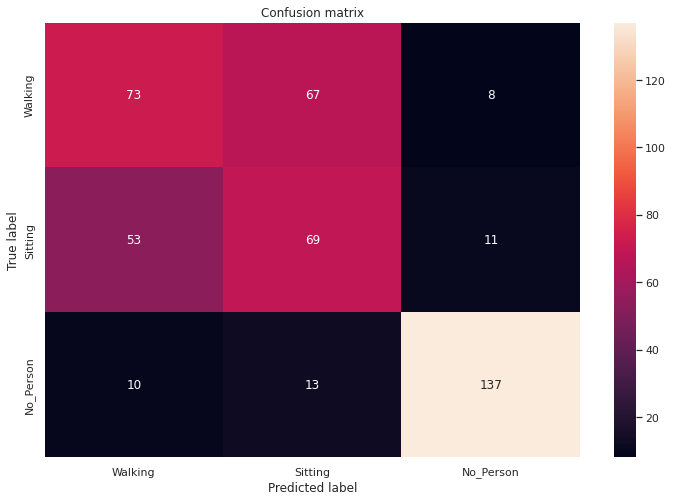

In [50]:

confusion_matrix_SVM = confusion_matrix(Y_test, Y_pred_SVM)

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix_SVM, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");

plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 3. Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


DT_param = {"max_depth": [3, None],
            "criterion": ["gini", "entropy"],
            "splitter":['best', 'random'],
            "max_features": ['auto', 'sqrt', 'log2']
              }

# max_depth: int, default=None , min_samples_split: int or float, default=2, min_samples_leaf: int or float, default=1
# max_features: int, float or {“auto”, “sqrt”, “log2”}, default=None

model_DT=DecisionTreeClassifier()

DT_clf = GridSearchCV(model_DT, DT_param, cv = kf ,return_train_score=False, refit = True) # , verbose = 3

DT_clf.fit(X_train, Y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [52]:
result_DT=pd.DataFrame(DT_clf.cv_results_)
# result_DT
result_DT[['param_criterion','param_splitter','param_max_features','rank_test_score','mean_test_score' ]]

param_criterion param_splitter param_max_features  rank_test_score  \
0             gini           best               auto               17   
1             gini         random               auto               20   
2             gini           best               sqrt                9   
3             gini         random               sqrt               24   
4             gini           best               log2               10   
5             gini         random               log2               21   
6             gini           best               auto                7   
7             gini         random               auto               14   
8             gini           best               sqrt                6   
9             gini         random               sqrt               12   
10            gini           best               log2               18   
11            gini         random               log2                5   
12         entropy           best               auto                3   
13         entropy         random               auto               19   
14         entropy           best               sqrt                1   
15         entropy         random               sqrt               23   
16         entropy           best               log2               15   
17         entropy         random               log2               22   
18         entropy           best               auto                2   
19         entropy         random               auto                4   
20         entropy           best               sqrt                8   
21         entropy         random               sqrt               11   
22         entropy           best               log2               16   
23         entropy         random               log2               13   

    mean_test_score  
0          0.575000  
1          0.506818  
2          0.593182  
3          0.477273  
4          0.592614  
5          0.505682  
6          0.596591  
7          0.582955  
8          0.600000  
9          0.589205  
10         0.571023  
11         0.600568  
12         0.605114  
13         0.509091  
14         0.619886  
15         0.485795  
16         0.580114  
17         0.486364  
18         0.606818  
19         0.603977  
20         0.594886  
21         0.591477  
22         0.578409  
23         0.586932

In [53]:
acc_DT = DT_clf.best_score_*100
print(f"Accuracy with DT: {acc_DT} %")


Accuracy with DT: 61.98863636363636 %


In [54]:
Y_pred_DT=DT_clf.predict(X_test)
DT_clf.score(X_test, Y_test)

0.5941043083900227

# 4. Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators = 100) 
 
model_RF.fit(X_train, Y_train)
 
y_pred = model_RF.predict(X_test)
 
from sklearn import metrics 
print()

# using metrics module for accuracy calculation
acc_RF= metrics.accuracy_score(Y_test, y_pred)*100



In [56]:
print(f"Accuracy with Random Forest: {acc_RF} %")

Accuracy with Random Forest: 63.718820861678005 %


# 5. XGBoost

## Precision, Recall and F1 score

In [57]:
from sklearn.metrics import precision_score , recall_score, f1_score

# Precision Score

# precision_score(Y_test,Y_pred_SVM)

# 6. Building the RNN model -- LSTM
This model contains 2 fully-connected and 2 LSTM layers (stacked on each other) with 64 units each:

In [58]:
XR_train, XR_test, YR_train, YR_test = train_test_split(reshaped_segments, labels, test_size=0.3, random_state=RANDOM_SEED)


Hyperparameter Tuning

In [71]:
L2_LOSS = 0.0025
LEARNING_RATE = 0.00025
num_hidden_layer = 128

# Training param
num_epochs=1000
BATCH_SIZE = 1024

In [72]:
num_classes = 3

In [73]:
def create_LSTM_model(inputs):
    W = {
        'hidden': tf1.Variable(tf.random_normal([num_features, num_hidden_layer])),
        'output': tf1.Variable(tf.random_normal([num_hidden_layer, num_classes]))
    }
    biases = {
        'hidden': tf1.Variable(tf.random_normal([num_hidden_layer], mean=1.0)),
        'output': tf1.Variable(tf.random_normal([num_classes]))
    }
    
    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, num_features])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden = tf.split(hidden, num_time_steps, 0)

    # Stack 2 LSTM layers
    lstm_layers = [tf.compat.v1.nn.rnn_cell.LSTMCell(num_hidden_layer, forget_bias=1.0) for _ in range(2)]
    
    lstm_layers = tf.keras.layers.StackedRNNCells(lstm_layers)


    outputs, _ = tf.compat.v1.nn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output']) + biases['output']


# Creating Placeholders:

In [74]:
tf.compat.v1.reset_default_graph() # To clear default graph

X = tf.placeholder(tf.float32, [None, num_time_steps, num_features], name="input") # X values that must be feed using feed dict
Y = tf.placeholder(tf.float32, [None, num_classes]) # Y values that must be feed using feed dict

In [75]:
pred_Y = create_LSTM_model(X)
pred_softmax = tf.nn.softmax(pred_Y, name="y_")

In [76]:
l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = Y)) + l2

In [77]:

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))


# Training

In [78]:
saver = tf.train.Saver()

history = dict(train_loss=[], 
                     train_acc=[], 
                     test_loss=[], 
                     test_acc=[])

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(XR_train)

for i in range(1, num_epochs + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: XR_train[start:end],
                                       Y: YR_train[start:end]})

    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={ X: XR_train, Y: YR_train})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={ X: XR_test, Y: YR_test})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    if i != 1 and i % 100 != 0:
        continue

    print(f'epoch: {i} test accuracy: {acc_test*100}% loss: {loss_test}')
    
predictions, acc_RNN_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: XR_test, Y: YR_test})

print()
# Convert acc in percent
acc_RNN = acc_RNN_final*100
print(f'final results: accuracy: {acc_RNN}% loss: {loss_final}')


epoch: 1 test accuracy: 30.000001192092896% loss: 3.196397304534912
epoch: 100 test accuracy: 62.727272510528564% loss: 2.1937618255615234
epoch: 200 test accuracy: 61.666667461395264% loss: 1.9533635377883911
epoch: 300 test accuracy: 62.727272510528564% loss: 1.8221557140350342
epoch: 400 test accuracy: 63.03030252456665% loss: 1.7335848808288574
epoch: 500 test accuracy: 63.48484754562378% loss: 1.6706281900405884
epoch: 600 test accuracy: 64.09090757369995% loss: 1.6242702007293701
epoch: 700 test accuracy: 64.54545259475708% loss: 1.586851954460144
epoch: 800 test accuracy: 63.93939256668091% loss: 1.5553014278411865
epoch: 900 test accuracy: 64.99999761581421% loss: 1.5265388488769531
epoch: 1000 test accuracy: 65.3030276298523% loss: 1.5004891157150269

final results: accuracy: 65.3030276298523% loss: 1.5004891157150269


In [79]:
import pickle  # implements binary protocols for serializing and de-serializing a Python object structure

# history = pickle.load(open("history.p", "rb"))
# predictions = pickle.load(open("predictions.p", "rb"))


# Evaluation

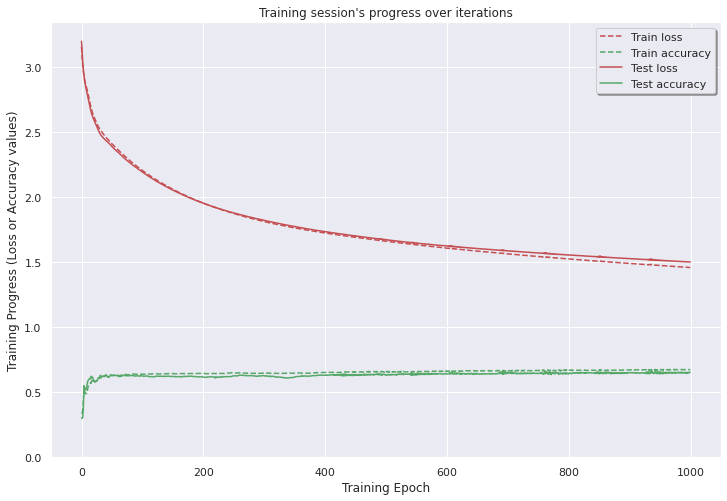

In [80]:
plt.figure(figsize=(12, 8))

plt.plot(np.array(history['train_loss']), "r--", label="Train loss")
plt.plot(np.array(history['train_acc']), "g--", label="Train accuracy")

plt.plot(np.array(history['test_loss']), "r-", label="Test loss")
plt.plot(np.array(history['test_acc']), "g-", label="Test accuracy")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training Epoch')
plt.ylim(0)

plt.show()

## Confusion matrix

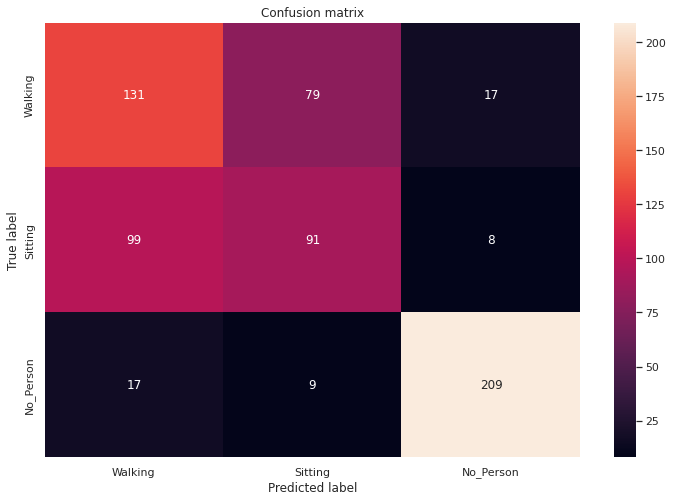

In [81]:
from sklearn.metrics import confusion_matrix

max_test = np.argmax(YR_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)

confusion_matrix = confusion_matrix(max_test, max_predictions)


plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Accuracy for different ML classifier model

In [82]:
print(f"1. Accuracy with K-Nearest Neighbour(KNN): {acc_KNN} % \n")
print(f"2. Accuracy with Support Vector Classifier: {acc_SVM} % \n")
print(f"3. Accuracy with Decision Tree: {acc_DT} % \n")
print(f"4. Accuracy with Random Forest: {acc_RF} % \n")
print(f"5. Accuracy with Recurrent Neural Network(RNN) : {acc_RNN} % \n")


1. Accuracy with K-Nearest Neighbour(KNN): 59.31818181818181 % 

2. Accuracy with Support Vector Classifier: 63.63636363636363 % 

3. Accuracy with Decision Tree: 61.98863636363636 % 

4. Accuracy with Random Forest: 63.718820861678005 % 

5. Accuracy with Recurrent Neural Network(RNN) : 65.3030276298523 % 

